# Expected vs. Reality: Is xG a True Predictor of Goals & Can Teams Use it to Gain Tactical Insight?

---

##  1) Survey Analysis: Public Perception of xG


### Overview

Since its introduction in **2017**, xG has risen to the forefront of football analytics.  

But how well do we **understand** how the figure is calculated? And what do fans **really think** of this cutting-edge statistic?  

To gain insight, a short survey aimed at assessing **awareness and perception of xG** was completed by **100 football fans** from pubs in the **Manchester area**.  

In this notebook, we will **analyze the responses** to better understand the **public perception of xG**.  


### The Survey

The short survey asked **four simple questions**:

- **Q1:** Do you know what xG is?  
- **Q2:** Prior to xG, what did you consider as the most indicative statistic of the result?  
- **Q3:** Do you know how xG is calculated?  
- **Q4:** Is xG the most indicative statistic of a result?  

---

Below, we will **read in the responses** and display the **first few rows** to get a feel for the data.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Get the absolute path of the current notebook/script
BASE_DIR = os.getcwd()

# Define the path to the data folder
DATA_DIR = os.path.join(BASE_DIR, "..", "Data")

#Load a CSV file from the Data folder
file_path = os.path.join(DATA_DIR, "survey_responses.csv")
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,"Q1: Prior to xG, what did you consider the most indicative statistic of the result?",Q2: Do you know what xG is?,Q3: Do you know how it is calculated?,Q4: Is it the most telling statistic other than goals?
0,P,Yes,No,No
1,S,Yes,No,Yes
2,P,Yes,No,Yes
3,P,Yes,Have an idea,Yes
4,S,Yes,No,Yes


## Analyzing Survey Responses

Now that we have loaded the survey data, we will analyze the responses to each question.


Below, we compute the response distributions and extract key insights.


In [7]:
# Calculate the proportions of responses for Q1
Q1_answers = df['Q1: Prior to xG, what did you consider the most indicative statistic of the result?'].value_counts(normalize=True) * 100

# Display Q1 responses
display(Q1_answers)

# Calculate percentage of respondents who answered "Yes" to Q2
percent_yes_Q2 = df['Q2: Do you know what xG is?'].value_counts(normalize=True) * 100
percent_yes_Q2 = percent_yes_Q2.get('Yes', 0)

# Filter respondents who know what xG is
Have_heard_df = df[df['Q2: Do you know what xG is?'] == 'Yes']

# Calculate the percentage of respondents who know how xG is calculated (Q3)
percent_yes_Q3 = Have_heard_df['Q3: Do you know how it is calculated?'].value_counts(normalize=True) * 100
percent_yes_Q3 = percent_yes_Q3.get('Yes', 0)

# Calculate the percentage who believe xG is the most telling statistic (Q4)
percent_yes_Q4 = Have_heard_df['Q4: Is it the most telling statistic other than goals?'].value_counts(normalize=True) * 100
percent_yes_Q4 = percent_yes_Q4.get('Yes', 0)

# Print key insights
print(f"Percentage of respondents who know what xG is: {percent_yes_Q2:.2f}%")
print(f"Percentage of respondents who know how xG is calculated: {percent_yes_Q3:.2f}%")
print(f"Percentage of respondents who believe xG is the most telling statistic: {percent_yes_Q4:.2f}%")

Q1: Prior to xG, what did you consider the most indicative statistic of the result?
S    52.0
P    45.0
O     3.0
Name: proportion, dtype: float64

Percentage of respondents who know what xG is: 94.00%
Percentage of respondents who know how xG is calculated: 17.02%
Percentage of respondents who believe xG is the most telling statistic: 75.53%


## Key Extracts from the Survey

- **94%** of respondents know what xG is.  
- Only **17%** understand how xG is calculated, highlighting a gap in deeper comprehension.  
- **75.5%** of respondents believe xG is the most indicative statistic of a result.  
- Before xG, **52%** considered **shots** the most important stat, while **45%** preferred **possession**.

### AfterThought
  
- The high awareness of xG, combined with the strong belief in its reliability as the most indicative statistic of a result, suggests that it has become both a widely recognized and highly respected metric in football analysis. 

## Visualizing Survey Responses with Pie Charts

To gain a clearer understanding of the survey results, we will use **pie charts** to represent key responses:

- **The first chart** visualizes which statistic fans considered the most indicative before xG.  
- **The second chart** shows the proportion of respondents who believe xG is the most telling statistic.  

These visualizations will help illustrate the **distribution of opinions** and highlight key trends in public perception of xG.


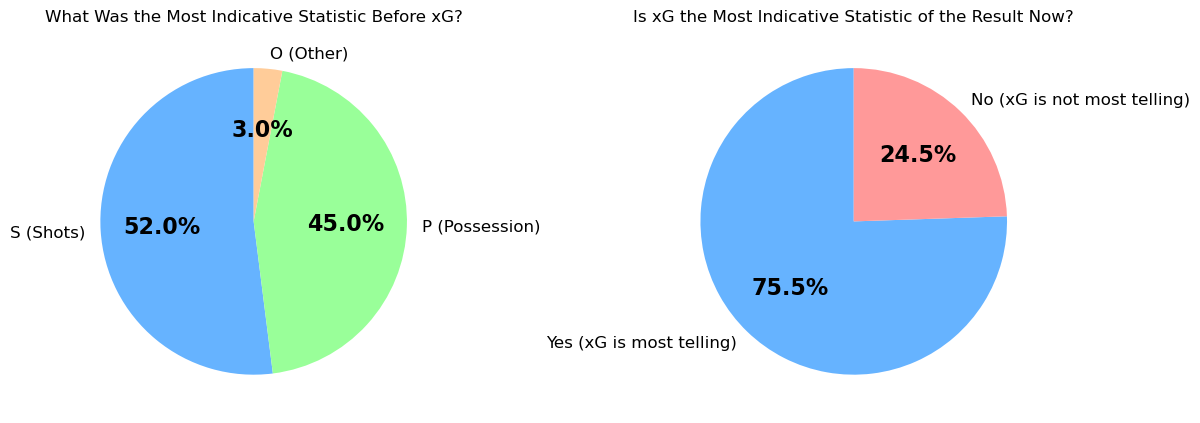

In [23]:
# Data for the first pie chart
labels1 = ['S (Shots)', 'P (Possession)', 'O (Other)']
sizes1 = [52.0, 45.0, 3.0]
colors1 = ['#66b3ff', '#99ff99', '#ffcc99']
explode1 = (0, 0, 0)  # No gaps

# Data for the second pie chart
labels2 = ['Yes (xG is most telling)', 'No (xG is not most telling)']
sizes2 = [75.53, 24.47]  
colors2 = ['#66b3ff', '#ff9999']
explode2 = (0, 0)  # No gaps

# Create a figure with subplots to display the charts side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First pie chart
wedges1, texts1, autotexts1 = axes[0].pie(
    sizes1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=colors1, explode=explode1
)
axes[0].set_title("What Was the Most Indicative Statistic Before xG?")

# Format the numbers and labels for the first pie chart
for i, autotext in enumerate(autotexts1):
    if labels1[i] == 'O (Other)':
        autotext.set_fontsize(16)  # Slightly larger font for "Other"
    else:
        autotext.set_fontsize(16)  # Larger font for other categories
    autotext.set_fontweight('bold')  # Make numbers bold

for label in texts1:
    label.set_fontsize(12)  # Make labels the same size but not bold

# Second pie chart
wedges2, texts2, autotexts2 = axes[1].pie(
    sizes2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=colors2, explode=explode2
)
axes[1].set_title("Is xG the Most Indicative Statistic of the Result Now?")

# Format the numbers and labels for the second pie chart
for autotext in autotexts2:
    autotext.set_fontsize(16)  # Make numbers larger
    autotext.set_fontweight('bold')  # Make numbers bold

for label in texts2:
    label.set_fontsize(12)  # Make labels the same size but not bold

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


## Final Thoughts

The results show a **clear affiliation and trust** toward xG, with **94%** of respondents knowing what it is and **75%** of those considering it the most indicative statistic of a result.  

However, the most striking insight is that while **75%** of fans trust xG as the best metric, only **17%** actually understand how it is calculated.  

This raises an important question:  
**Fans trust xG, but does it truly deserve that trust?**  
**Are we really to expect the 'expected'?**  

In the next notebook, we will move beyond perception and **evaluate xG as a predictor**, analyzing its accuracy in football matches.